In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

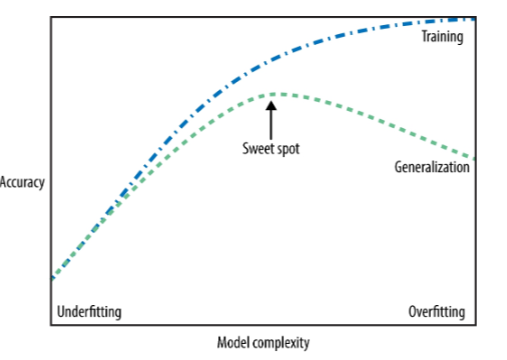

In [8]:
# !pip install mglearn

In [9]:
import mglearn

### Example

Synthetic two class classification dataset.

X.shape (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


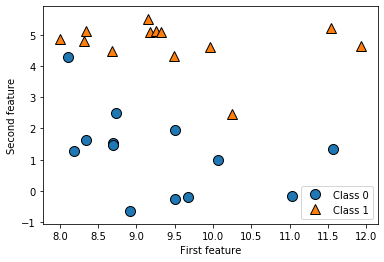

In [13]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(['Class 0','Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape', X.shape)

To illustrate regression algorithms, we will use the synthetic wave dataset.

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

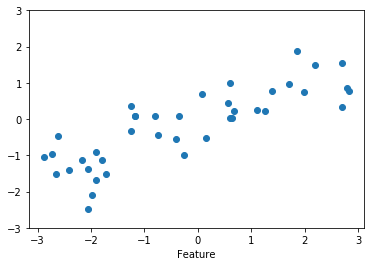

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylable('Target')

We will use a small symthetic datasets with two real-world datasets that are included in scikit-learn:
* Wisconsin Breast Cancer dataset (classification)
* Boston housing dataset (regression)

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('canver.keys():\n', cancer.keys())

canver.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print('Shape of cancer data: ', cancer.data.shape)

Shape of cancer data:  (569, 30)


In [16]:
print('Sample counts per class:\n', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [17]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: ', boston.data.shape)

Data shape:  (506, 13)


In [19]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape :', X.shape)

X.shape : (506, 104)


## k-Nearest Neighbors

To make predictions for a new data point, the algorithm finds the closest data points in the trainig set -its 'nearest neighbor'.

### k-Neighbors classification

In its simplest version, the k-nn algoritm only considers exactly one neares neighbor, which is the closest training point to the point we want to make a prediction for.

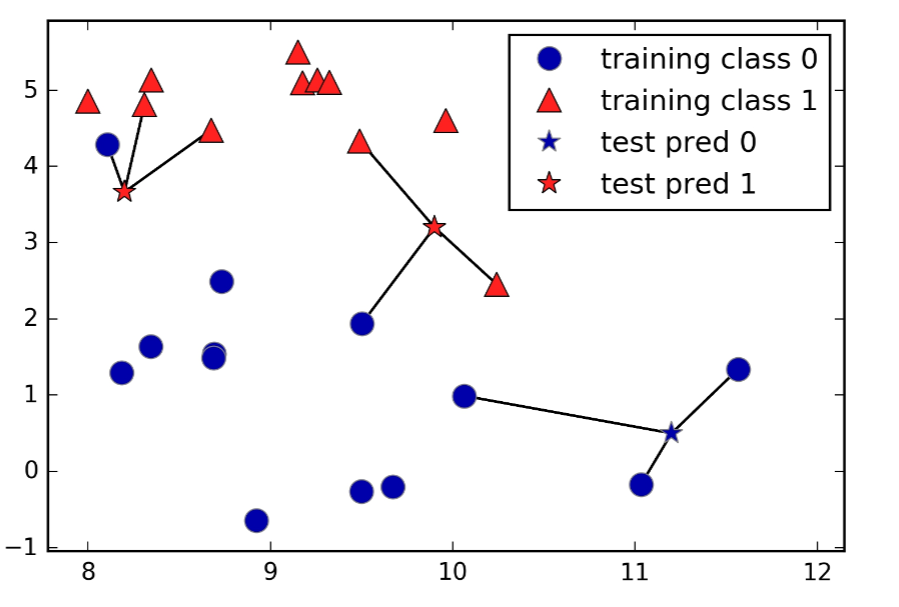

The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross)

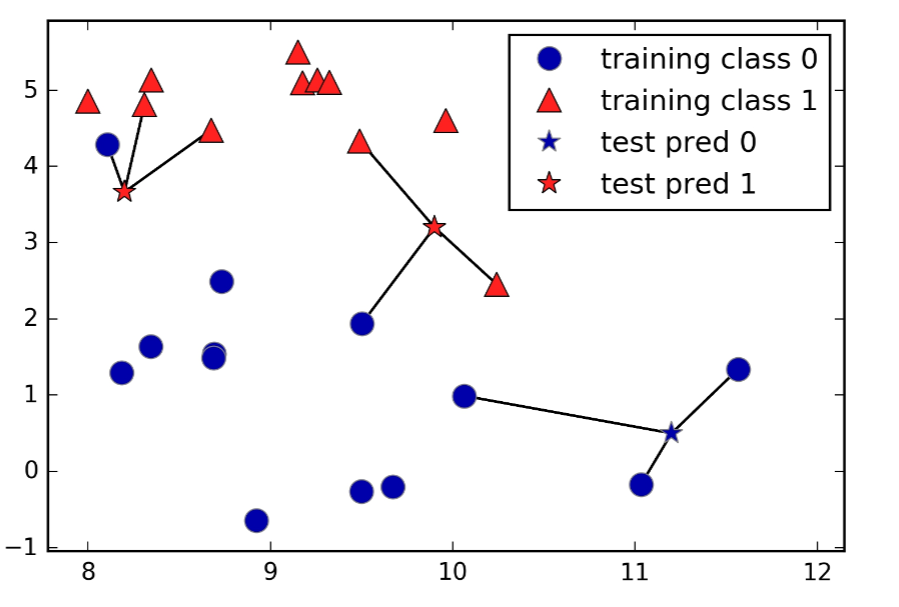

The image above uses three closest neighbors

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


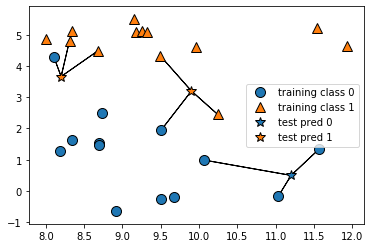

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Example with make forge data set

In [21]:
# 1 splitting the data into a training set and a test set

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
# 2) Class instantiation. Setting parameters (for example, neighbors to use)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [23]:
# 3) Fitting the classifier using the training set

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
# 4) Make predictions. For each ata point in the test set, this computes its nearest neighbors in the training set and finds
# the most common class among these:

print('Test set predictions: ', clf.predict(X_test))

Test set predictions:  [1 0 1 0 1 0 0]


In [25]:
# 5) Evaluation of the model generarization

print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


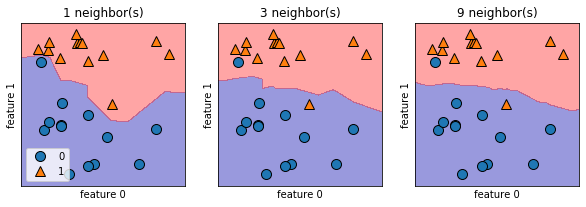

In [26]:
# 6) When possible visualization

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object itself, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

Using a single neighbor results in a decision boundary that follow the training data closely. Considering more and more neighbors leasd to a smoother decision boundary. **A smoother boundary corresponds to a simpler model**.

### Example with breast cancer data set

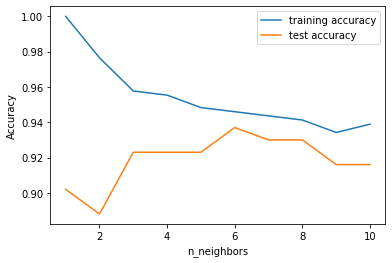

In [27]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

The best performance is using around 6 neighbors.

## k-neighbors regression

We will use the wave dataset to explore the **regression variant of the k-nearest neighbors algorithm**.

The example below is with 1 neighbor.

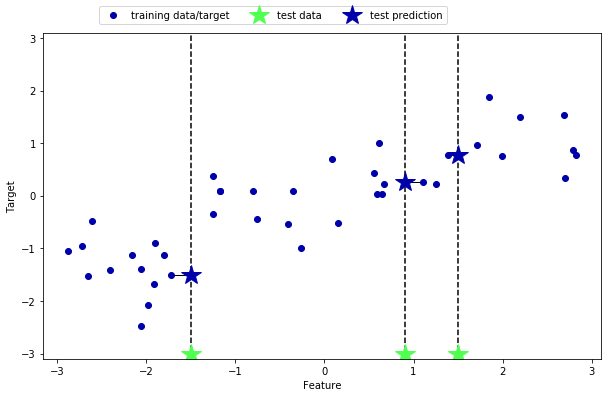

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

When using *multiple* nearest neighbors, the prediction is the average, or mean, of the relevant neigbors.

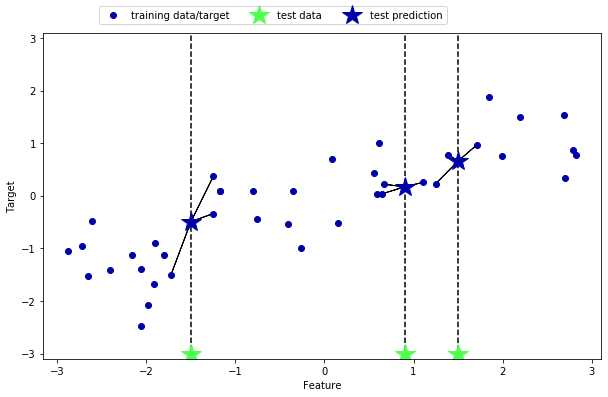

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the **KNeighborsRegressor** class in *scikit.learm*.

In [30]:
from sklearn import neighbors

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training an a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instatitate the model and set the numbe of neighbors to consider to 3
reg = neighbors.KNeighborsRegressor(n_neighbors=3)

# fit the model using the taining data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [31]:
print('Test set predictions:\n',reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [32]:
X_test

array([[-1.24713211],
       [ 0.67111737],
       [ 1.71105577],
       [-2.06388816],
       [-2.87649303],
       [-1.89957294],
       [ 0.55448741],
       [ 2.81945911],
       [-0.40832989],
       [-2.72129752]])

The *score* method returs the R2 scores.

In [33]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analying KNeighborsRegressor

We can see what the predictions looks like for all possible feature values

1
3
9


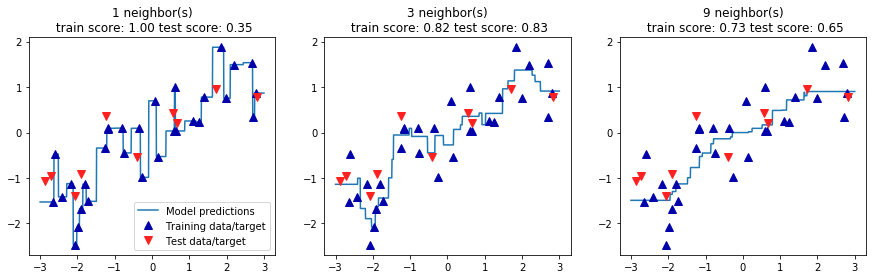

In [34]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

#create 1k datapoints, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    #make predictions using 1,3 ,9 neighbors
    reg = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test,'v', c=mglearn.cm2(1), markersize=8)
    print(n_neighbors)
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    
axes[0].legend(['Model predictions','Training data/target', 'Test data/target'], loc='best')

The k-nearest neightobrs algorithms is easy to understand, but it is not often used in practice, due to prediction being slow and its inability to handle many features.

## Linear models

These models make predictions using a *linear function* of the input features.

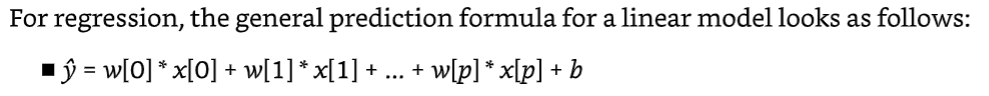

Linear models for regression can be charactirized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions.

There are many differen linear models for regression. The difference between these models lies in how the model parameters *w* adn *b* are learned from the training data, and how model complexity can be controlled.

w[0]: 0.393906  b: -0.031804


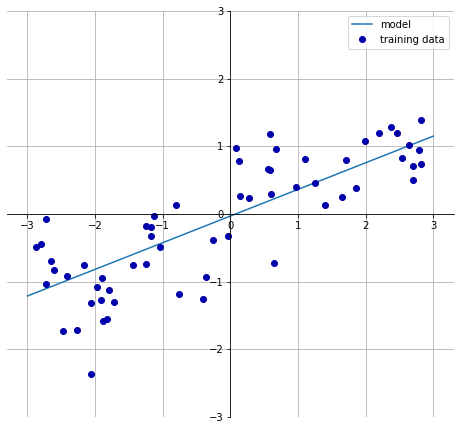

In [35]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinari least squares (OLS))

Linear reggression finds the parameters *w* and *b* that minimize the **mean squared error** between predictions and the true regression targets, *y*, on the training set. The mean squared error is the sum of the sqiared differences between the predictions and the true values, divided by the number of samples.

In [36]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_: ', lr.coef_)
print('lr.intercept_: ', lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


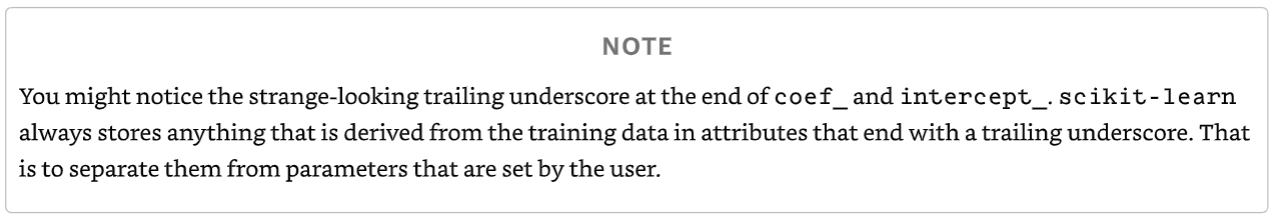

In [37]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score:0.66


The R^2 are not good, but since the scores of the training and test sets are very close, this means we are likely underfitting, not overfitting.

In [38]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Training set score:0.95
Test set score:0.61


The discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity, one alternative is use *ridge regression*

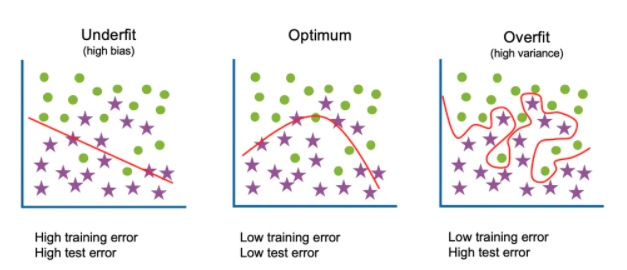

**Overfitting** is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data. When the model trains for too long on sample data or when the model is too complex, it can start to learn the “noise,” or irrelevant information, within the dataset. When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data. If a model cannot generalize well to new data, then it will not be able to perform the classification or prediction tasks that it was intended for.

Low error rates and a high variance are good indicators of overfitting. In order to prevent this type of behavior, part of the training dataset is typically set aside as the “test set” to check for overfitting. If the training data has a low error rate and the test data has a high error rate, it signals overfitting.

### Ridge regression

In Ridge regression, the coefficients *w* are chosen not only so that they predict well on the training data, but also to fit and additional constraint:

* We want the magnitude of the coefficients to be as small as possible. Intiutively, this means each feature shoudl have as little effect on the outcome as possible, while still predicting well. This constrain is an example of what is called **regularization** (explicitly restricting a model to *avoid overfitting*), this know as L2 regularization.

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print('Training set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


With linear regression, we were overfitting our data. **Ridge** is a momre restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set (0.85 in Ridge vs 0.95 in Linear), but better generalization in the test set (0.75 in Ridge vs 0.61 in linear) or prediction.

The **Ridge** model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set.

How much importance the model places on simplicity versus training set performance can be specified using the **alpha** parameter. Increasing **alpha** forces coefficients to move more toward zero, which decreases training set performance but MIGTH help generalization.

In [40]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


For very small values of **alpha**, coefficients are barely restricted at all, an we end up with a model that resembles LinearRegression.

In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


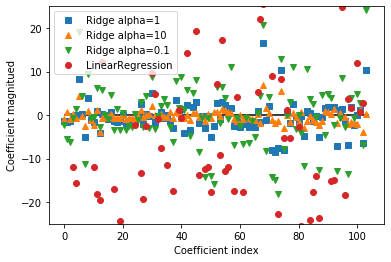

In [42]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitued')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

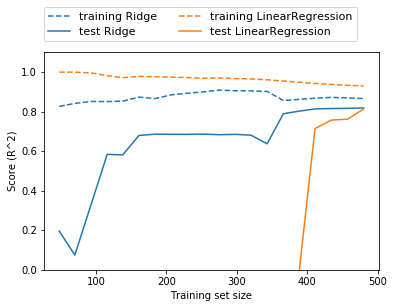

In [43]:
mglearn.plots.plot_ridge_n_samples()

With enough training data, regularization becomes less important, and give enough data, ridge and linea regression will have the same performance

### Lasso

Lasso also restricts coefficients to be close to zero with a regularization called L1: some coeffiecients are exactly zero, meaning that some features are entirely ignored by the model. 

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: ', np.sum(lasso.coef_ !=0))

Training set score: 0.29
Test set score: 0.21
Number of features used:  4


The current set up of the Lasso model uses only 4 of the 104 features. We can modify alpha and maximum number of iterations

In [53]:
# we increase the default setting of 'max_iter'
# otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: ', np.sum(lasso001.coef_ !=0))

Training set score:0.90
Test set score:0.77
Number of features used:  33


In [54]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: ', np.sum(lasso00001.coef_ !=0))

Training set score:0.95
Test set score:0.64
Number of features used:  96


Text(0, 0.5, 'Coefficient magnitude')

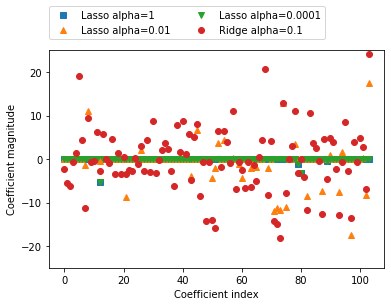

In [55]:
plt.plot(lasso.coef_,'s', label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^', label='Lasso alpha=0.01')
plt.plot(lasso.coef_,'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

In practice, ridge regreesion is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

### Linear models for classification

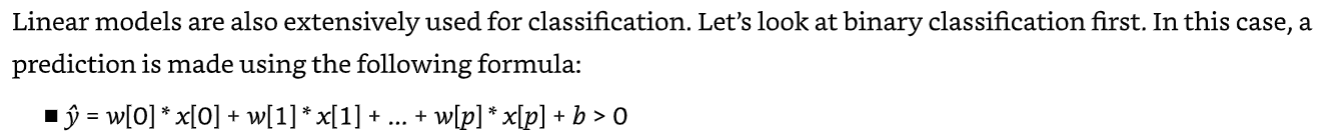

The formula looks very similar to the one for linear regressio, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class -1; if it is larger than zero, we predict the class +1.

For **linear models for classification**, the *decision boundary* is a linear function of the input. In other words, a )binary) linear classifier that separates two classes using a line, a plane, or a hyperplane.

The algorithms for this type of linear regression differ in:

* The way in which they measure how well a particular combination of coefficients and intercept fits the training data

* If and what kind of regularization they use

The two most common linear classification algorithms are *logist regression* and *linear support vector machines*

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


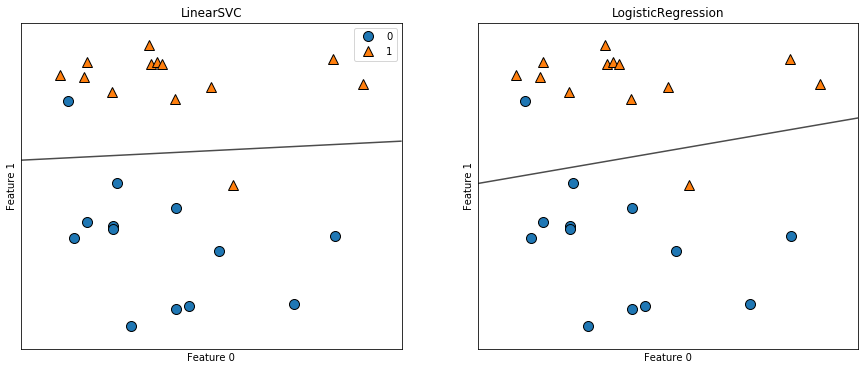

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(15,6))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

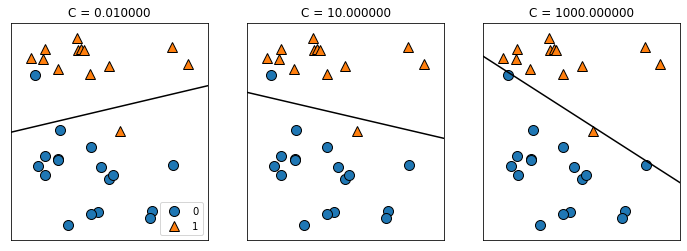

In [67]:
# SVC with different C parameters
# low values of C will cause the algorithms to try to adjust to the majority of data points
# high values of C stresses the importance that each individual data point be classified correctly
mglearn.plots.plot_linear_svc_regularization()

In [68]:
# breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# with default value C=1
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg.score(X_test, y_test)))

Training set score:0.958
Test set score:0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score:0.974
Test set score:0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score:0.925
Test set score:0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


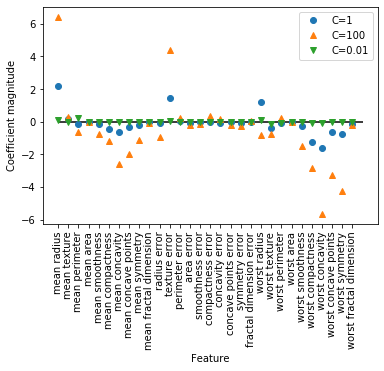

In [78]:
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with c=0.001:0.92
Test accuracy of l1 logreg with c=0.001:0.92
Training accuracy of l1 logreg with c=1.000:0.96
Test accuracy of l1 logreg with c=1.000:0.95
Training accuracy of l1 logreg with c=100.000:0.99
Test accuracy of l1 logreg with c=100.000:0.97


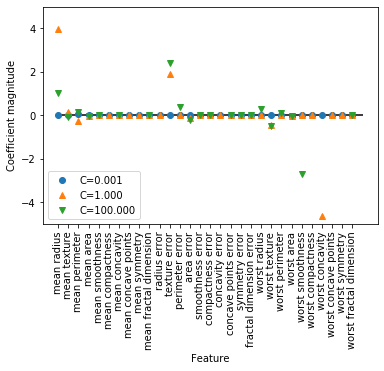

In [82]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with c={:.3f}:{:.2f}'.format(C,lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with c={:.3f}:{:.2f}'.format(C,lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5,5)
plt.legend(loc=3)

In [84]:
type(X_train)

numpy.ndarray